In [62]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class SmallerVGGNet:
#@staticmethod
     def build(width, height, depth, classes, finalAct="softmax"):
# initialize the model along with the input shape to be
# "channels last" and the channels dimension itself
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

# if we are using "channels first", update the input shape
# and channels dimension
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

# CONV => RELU => POOL
        model.add(Conv2D(32, (3, 3), padding="same",
             input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(3, 3)))
        model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

# (CONV => RELU) * 2 => POOL
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation("relu"))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

# softmax classifier
        model.add(Dense(classes))
        model.add(Activation(sigmoid))

# return the constructed network architecture
        return model

In [63]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
 
# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from pyimagesearch.smallervggnet import SmallerVGGNet
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os

In [64]:
from glob import glob

In [65]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
#ap.add_argument("-data_dir", type=str, default='--D:/MultipleLabels/keras-multi-label/dataset/', help='path to input dataset (i.e., directory of images)')
#ap.add_argument("-model_dir", type=str, default='--D:/MultipleLabels/keras-multi-label/fashion.model',   help='path to output model')
ap.add_argument("-data_dir", type=str, default='--/keras-multi-label/dataset/') #, help='path to input dataset (i.e., directory of images)')
ap.add_argument("-model_dir", type=str, default='--/keras-multi-label/fashion.model')#,   help='path to output model')

args = vars(ap.parse_args())
%tb

usage: __main__.py [-h] [-data_dir DATA_DIR] [-model_dir MODEL_DIR]
__main__.py: error: unrecognized arguments: -f C:\Users\mahmo\AppData\Roaming\jupyter\runtime\kernel-f832c54a-7467-4ddb-9879-9dc140e22ea8.json


SystemExit: 2

C:\Users\mahmo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [66]:
# initialize the number of epochs to train for, initial learning rate,
# batch size, and image dimensions
EPOCHS = 75
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)

# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images('dataset/*/*')))
imagePaths = sorted(list(paths.list_images()
random.seed(42)
random.shuffle(imagePaths)
 
# initialize the data and labels
data = []
labels = []

In [67]:
imagePaths = sorted(list(glob("dataset/*/*")))
data = []
labels = []

In [68]:
#imagePathes

In [69]:
import re


In [70]:
# loop over the input images
parser=argparse.ArgumentParser()

for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
    image = img_to_array(image)
    data.append(image)
 
     # extract set of class labels from the image path and update the
    # labels list
    l = label = imagePath.split(os.path.sep)[-2].split("_")
   # l = label = imagePath.split(os.path.split)[0].split('/')[1].split('_')
    labels.append(l)

In [71]:
labels

[['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'jeans'],
 ['black', 'j

In [72]:
len(labels)




2167

In [73]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {} images ({:.2f}MB)".format(
len(imagePaths), data.nbytes / (1024 * 1000.0)))


[INFO] data matrix: 2167 images (468.07MB)


In [74]:
# binarize the labels using scikit-learn's special multi-label
# binarizer implementation
print("[INFO] class labels:")
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)
 
# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
    print("{}. {}".format(i + 1, label))

[INFO] class labels:
1. black
2. blue
3. dress
4. jeans
5. red
6. shirt


In [75]:
labels

array([[1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 1]])

from sklearn.preprocessing import MultiLabelBinarizer
labels2 = [("blue", "jeans"),("blue", "dress"),("red", "dress"),("red", "shirt"),("blue", "shirt"),("black", "jeans")]
mlb = MultiLabelBinarizer()
mlb.fit(labels2)
MultiLabelBinarizer(classes=None, sparse_output=False)
mlb.classes_




mlb.transform([("red", "dress")])

In [76]:
print(data.shape)

print(type(data))
print(type(labels))
print(labels.shape)

(2167, 96, 96, 3)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(2167, 6)


In [77]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.2, random_state=42)
 
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [99]:
type(aug)

keras.preprocessing.image.ImageDataGenerator

In [78]:
print("[INFO] compiling model...")
model = SmallerVGGNet.build(
width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
depth=IMAGE_DIMS[2], classes=len(mlb.classes_),
finalAct="sigmoid")
 
# initialize the optimizer
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

[INFO] compiling model...


In [81]:
# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,
metrics=["accuracy"])
 
# train the network
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainY, batch_size=BS),
    validation_data=(testX, testY),
    steps_per_epoch=len(trainX) // BS,
    epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/75
54/54 [==============================] - 11s 210ms/step - loss: 0.3309 - acc: 0.8647 - val_loss: 0.7660 - val_acc: 0.6217
Epoch 2/75
54/54 [==============================] - 5s 91ms/step - loss: 0.1672 - acc: 0.9392 - val_loss: 0.9810 - val_acc: 0.7427
Epoch 3/75
54/54 [==============================] - 5s 90ms/step - loss: 0.1467 - acc: 0.9468 - val_loss: 0.9189 - val_acc: 0.6601
Epoch 4/75
54/54 [==============================] - 5s 91ms/step - loss: 0.1463 - acc: 0.9477 - val_loss: 1.0836 - val_acc: 0.6421
Epoch 5/75
54/54 [==============================] - 5s 90ms/step - loss: 0.1351 - acc: 0.9522 - val_loss: 0.9747 - val_acc: 0.7880
Epoch 6/75
54/54 [==============================] - 5s 90ms/step - loss: 0.1135 - acc: 0.9623 - val_loss: 0.9932 - val_acc: 0.8065
Epoch 7/75
54/54 [==============================] - 5s 91ms/step - loss: 0.1083 - acc: 0.9607 - val_loss: 0.8214 - val_acc: 0.7780
Epoch 8/75
54/54 [==============================] - 5s

In [82]:
# save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])
 
# save the multi-label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open(args["labelbin"], "wb")
f.write(pickle.dumps(mlb))
f.close()

[INFO] serializing network...


NameError: name 'args' is not defined

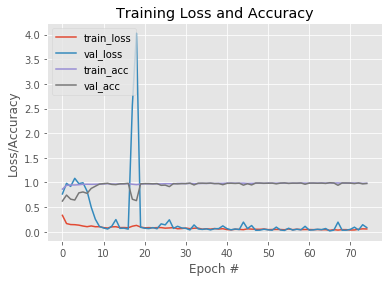

In [86]:
# plot the training loss and accuracy
%matplotlib inline
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
#plt.savefig(args["plot"])
plt.show()

In [89]:
pred=model.predict(testX)

In [90]:
pred

array([[2.7967994e-07, 2.8758905e-05, 9.9998784e-01, 1.8953782e-06,
        9.9999905e-01, 1.6993548e-06],
       [3.8726458e-07, 1.4320040e-05, 9.9624276e-01, 1.0497152e-04,
        1.0000000e+00, 1.6722931e-03],
       [2.8229690e-06, 1.1650398e-03, 9.9971253e-01, 2.8170980e-05,
        9.9982280e-01, 2.8528821e-05],
       ...,
       [5.3812691e-04, 9.9998820e-01, 3.6258844e-01, 3.8932837e-04,
        9.8860955e-09, 7.7784568e-01],
       [9.9998248e-01, 5.2561722e-05, 9.5061360e-08, 1.0000000e+00,
        3.7664769e-10, 1.8038398e-05],
       [8.1040402e-05, 3.7716335e-04, 2.2128897e-05, 1.0002643e-03,
        9.9999690e-01, 9.9987793e-01]], dtype=float32)

In [97]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

n_classes = 6#y.shape[1]
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testY[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testY.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)



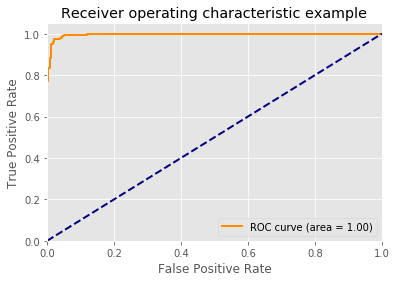

In [98]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

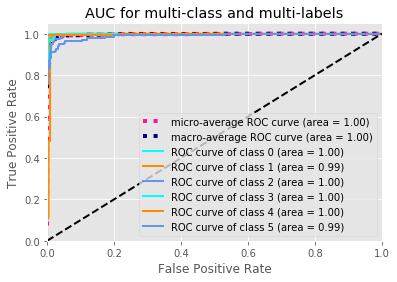

In [101]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC for multi-class and multi-labels')
plt.legend(loc="lower right")
plt.show()

In [108]:
fpr[0]


array([0.        , 0.        , 0.        , 0.        , 0.00274725,
       0.00274725, 0.00549451, 0.00549451, 0.15384615, 0.15934066,
       0.21428571, 0.21978022, 0.83516484, 0.84065934, 1.        ])

In [105]:
fpr[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0045045 , 0.0045045 ,
       0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 ,
       0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 ,
       0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 , 0.0045045 ,
       0.00900901, 0.00900901, 0.00900901, 0.00900901, 0.00900901,
       0.00900901, 0.00900901, 0.00900901, 0.01351351, 0.01351351,
       0.01801802, 0.01801802, 0.02252252, 0.02252252, 0.05855856,
       0.05855856, 0.19369369, 0.2027027 , 0.94594595, 0.95495495,
       1.        ])

In [109]:
fpr[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00363636, 0.00363636, 0.00727273, 0.00727273,
       0.01090909, 0.01090909, 0.01818182, 0.01818182, 0.02181818,
       0.02181818, 0.04      , 0.04      , 0.04363636, 0.04363636,
       0.05090909, 0.05090909, 0.12      , 0.12      , 0.26545455,
       0.27272727, 0.75636364, 0.76363636, 0.81454545, 0.82181818,
       0.83636364, 0.84363636, 1.        ])